In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math
import datetime
import platform

In [2]:
print('python version:',platform.python_version())
print('Tensorflow version:',tf.__version__)
print('Keras version:',tf.keras.__version__)

python version: 3.12.4
Tensorflow version: 2.18.0
Keras version: 3.9.0


In [3]:
# pip install Tensorflow 

In [4]:
!rm -rf ./ ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
mnist_dataset = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist_dataset.load_data()

In [6]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [7]:
(_,IMAGE_WIDTH,IMAGE_HEIGHT) =x_train.shape
IMAGE_CHANNEL=1
print('IMAGE_WIDTH:',IMAGE_WIDTH);
print('IMAGE_HEIGHT:',IMAGE_HEIGHT);
print('IMAGE_CHANNEL:',IMAGE_CHANNEL);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNEL: 1


In [8]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


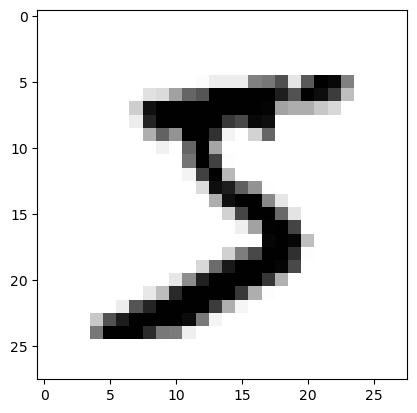

In [9]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

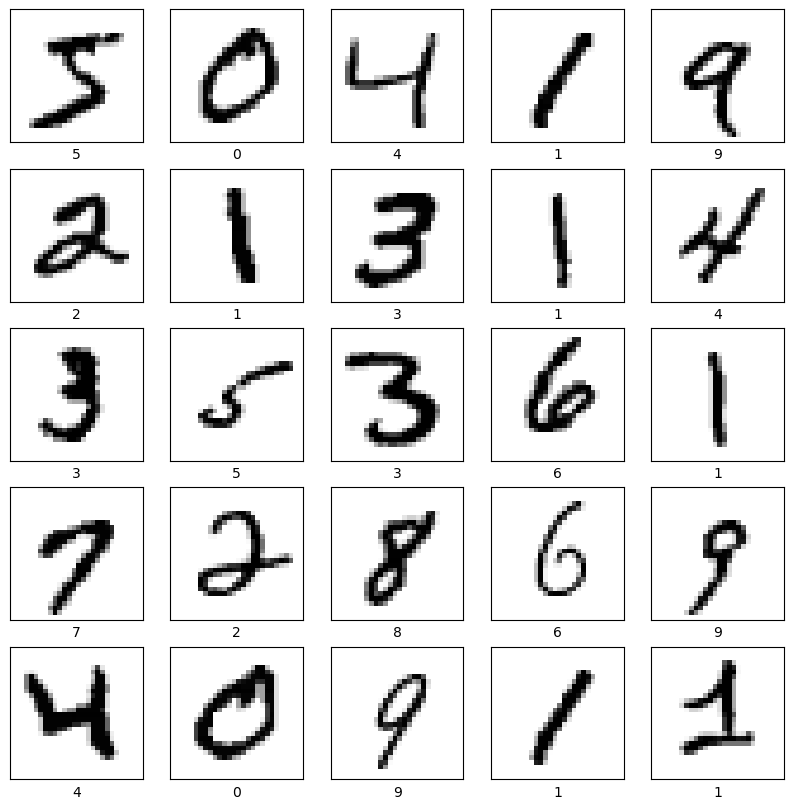

In [10]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
  plt.subplot(num_cells, num_cells, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()

In [11]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNEL
) 
x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNEL
)

In [12]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [13]:
x_train_normalized= x_train_with_chanels/255
x_test_normalized= x_test_with_chanels/255

In [14]:
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNEL),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

C:\Users\Admin\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [18]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [20]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [42]:
import graphviz 
print(graphviz.__version__)


0.20.3


In [44]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [52]:
import graphviz as plot_model

In [54]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [56]:
import tensorflow as tf

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [62]:
import tensorflow as tf
import datetime

log_dir = ".logs/fit/" + datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=30,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.9888 - val_loss: 0.0383
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9971 - loss: 0.0091 - val_accuracy: 0.9897 - val_loss: 0.0374
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9974 - loss: 0.0071 - val_accuracy: 0.9913 - val_loss: 0.0323
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9978 - loss: 0.0063 - val_accuracy: 0.9882 - val_loss: 0.0445
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9979 - loss: 0.0058 - val_accuracy: 0.9894 - val_loss: 0.0417
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9980 - loss: 0.0065 - val_accuracy: 0.9901 - val_loss: 0.0383
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9983 - loss: 0.0048 - val_accuracy: 0.9888 - val_loss: 0.0446
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9984 - loss: 0.0043 - 

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

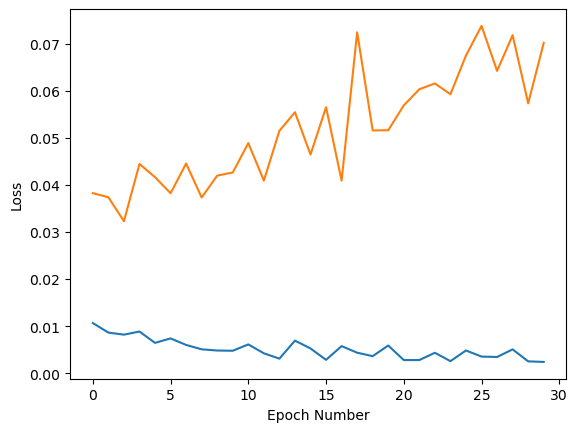

In [64]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'],label='training set')
plt.plot(training_history.history['val_loss'],label='test set')
plt.legend

In [66]:
%%capture
validation_loss,validation_accuracy=model.evaluate(x_test_normalized,y_test)


In [68]:
print('validation loss:',validation_loss)
print('validation accuracy:', validation_accuracy)

validation loss: 0.07023624330759048
validation accuracy: 0.9897000193595886


In [70]:
%%capture
train_loss,train_accuracy=model.evaluate(x_train_normalized,y_train)


In [72]:
print('train loss:',train_loss)
print('train accuracy:', train_accuracy)

train loss: 0.008527670055627823
train accuracy: 0.998116672039032


In [76]:
model_name ='digits_recognition_cnn.h5'
model.save(model_name,save_format='h5')

In [80]:
loaded_model = tf.keras.models.load_model(model_name)

In [82]:
predictions_one_hot =loaded_model.predict(x_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [90]:
print('predictions_one_hot:',predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [94]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.258975e-28,8.048535e-25,5.333709e-20,8.169834e-23,3.634268e-18,8.330079e-23,0.000000e+00,1.000000e+00,4.367677e-24,5.982742e-16
1,1.045327e-25,2.846387e-24,1.000000e+00,2.158682e-36,1.793160e-33,0.000000e+00,2.466600e-28,1.996265e-28,5.840366e-30,0.000000e+00
2,6.760725e-28,1.000000e+00,4.768054e-17,1.118460e-32,4.711271e-14,3.763374e-18,4.137617e-23,6.532419e-16,8.594128e-19,3.063328e-25
3,1.000000e+00,6.174987e-31,1.308329e-27,2.657954e-33,2.503386e-31,1.799095e-31,9.090042e-31,2.175100e-27,1.221073e-30,2.923721e-22
4,2.634764e-27,2.446371e-19,6.686677e-28,9.696496e-27,1.000000e+00,7.593598e-23,6.886713e-19,7.201338e-21,2.471291e-20,8.905686e-14
...,...,...,...,...,...,...,...,...,...,...
9995,1.768313e-24,5.941917e-23,1.000000e+00,4.924514e-25,9.108689e-30,0.000000e+00,3.236464e-36,1.964476e-13,2.577997e-25,2.952286e-32
9996,2.095256e-34,6.791022e-27,1.838097e-29,1.000000e+00,0.000000e+00,1.817415e-17,0.000000e+00,3.967064e-28,7.969968e-29,2.947359e-23
9997,2.159266e-37,1.578403e-22,1.592814e-33,0.000000e+00,1.000000e+00,1.850343e-32,1.111965e-31,3.783855e-35,5.137713e-23,2.140986e-34
9998,1.952116e-17,9.622032e-26,1.603413e-29,1.059257e-23,5.873382e-32,1.000000e+00,3.353904e-15,7.592130e-28,1.127443e-13,9.825294e-26


In [100]:
prediction =np.argmax(predictions_one_hot,axis=1)
pd.DataFrame(prediction)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


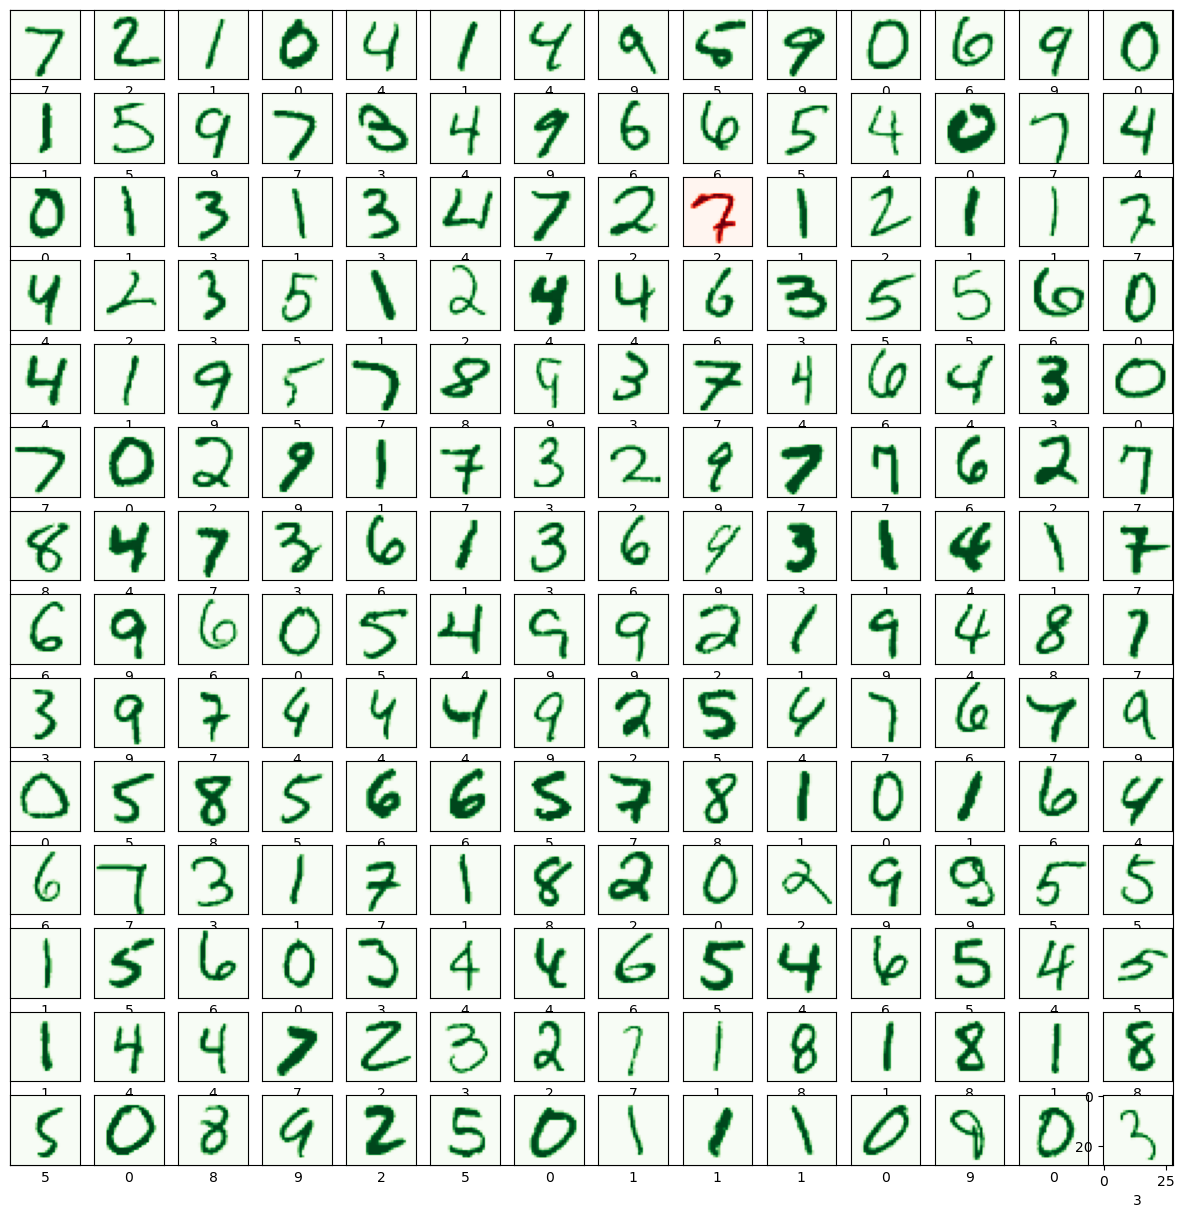

In [104]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = prediction[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map='Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.show()